In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [61]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from src.energy_consumption import Energy2011
from src.Constants import Constants
sns.set_theme(style="ticks")

# 1. Energy consumption in buildings

In [39]:
trans = pd.read_csv('../data/privatna_vozila_2011.csv')
heat = pd.read_csv('../data/vinkovci_grijanje_2011.csv')
ele = pd.read_csv('../data/vinkovci_struja_2011.csv')

In [38]:
charts = Energy2011()

In [45]:
heat.groupby('kategorija')['potrošnja_energije(kWh)']

In [41]:
pivoted = heat.pivot_table(
    index=['nadkategorija', 'kategorija', 'broj zgrada', 'ukupna_grijana_površina', 
           'specifična_potrošnja_energije(kWh/m2)'],
    columns='energent', 
    values='potrošnja_energije(kWh)',
    aggfunc='sum',
    fill_value=0
).reset_index()

/home/dionizije/Documents/vk_secap/src/energy_consumption.py:32: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  chart = plt.pie(


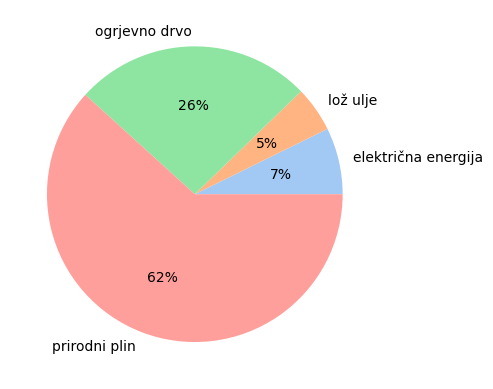

In [49]:
toplina_izvor = charts.heat_by_source()
toplina_sektor = charts.energy_by_sector('heat')
struja_sektor = charts.energy_by_sector('electricity')
gas_by_type = charts.gas_by_type()
gas_by_category = charts.gas_by_category()
illumination = charts.illumination()

In [65]:
sns.set_theme()

In [132]:
heat

,nadkategorija,kategorija,broj zgrada,energent,ukupna_grijana_površina,potrošnja_energije(kWh),specifična_potrošnja_energije(kWh/m2)
0,zgrade javne namjene,školstvo,14,prirodni plin,23399.36,3219444.26,137.59
1,zgrade javne namjene,školstvo,14,lož ulje,107.50,15304.42,142.37
2,zgrade javne namjene,uprava,15,prirodni plin,4123.35,593800.58,144.01
3,zgrade javne namjene,uprava,15,električna energija,210.00,37800.00,180.00
4,zgrade javne namjene,kulturne ustanove,8,prirodni plin,5809.25,657677.56,113.21
5,zgrade javne namjene,kulturne ustanove,8,lož ulje,812.00,63258.26,77.90
6,zgrade javne namjene,objekti i uredi gradskih tvrtki,6,prirodni plin,3629.20,473136.97,130.37
7,stambeni objekti,stambeni sektor,13326,prirodni plin,595855.00,85563071.34,143.60
8,stambeni objekti,stambeni sektor,13326,lož ulje,32000.00,5760003.51,180.00
9,stambeni objekti,stambeni sektor,13326,ogrjevno drvo,229171.00,41250808.53,180.00


In [150]:
df = pd.DataFrame(data)

# Pivot the data to get categories in rows and energents as columns
df_pivot = df.pivot(index='kategorija', columns='energent', values='potrošnja_energije(kWh)').fillna(0)

# Reorder columns to ensure correct hues
order = ['prirodni plin', 'lož ulje', 'ogrjevno drvo', 'električna energija']
df_pivot = df_pivot[order]

# Sort by total consumption
df_pivot['Total'] = df_pivot.sum(axis=1)
df_pivot = df_pivot.sort_values(by='Total', ascending=True).drop(columns=['Total'])

# Plot
ax = df_pivot.plot(kind='barh', stacked=True, figsize=(12, 6), logx=True, width=0.5)
ax.set_xlabel('Potrošnja Energije (kWh) - Log Scale')
ax.set_title('Potrošnja Energije by Kategorija and Energent')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

NameError: name 'data' is not defined